In [1]:
import sys
sys.path.append("/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211")

from src.service.MetricsService import MetricsService

instance = MetricsService()


FSS = instance.compute_multi_fss_service()

/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211/src/service/MetricsService.py:99: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self.metrics_service_impl_instance.compute_multi_fss_service_impl()
/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211/src/service/MetricsService.py:99: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self.metrics_service_impl_instance.compute_multi_fss_service_impl()
/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211/src/service/MetricsService.py:99: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self.metrics_service_impl_instance.compute_multi_fss_service_impl()
/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211/src/servic

0.0003


In [1]:
print(FSS)

NameError: name 'FSS' is not defined

In [3]:
import glob
import os
import pandas as pd

import sys
sys.path.append("/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211")

from src.controller.PathController import PathController
from src.service.MDK2SimDateService import MDK2SimDateService
from src.service.MDK2SimExtentService import MDK2SimExtentService
from src.serviceImpl.MetricsServiceImpl import MetricsServiceImpl


path_controller_instance = PathController()
mdk2_sim_date_instance = MDK2SimDateService()
mdk2_sim_extent_instance = MDK2SimExtentService()
metric_service_instance = MetricsServiceImpl()

def compute_multi_fss():

    ''' Punto in cui agire per restringere le osservazioni a pochi giorni '''
    list_of_obs = glob.glob(path_controller_instance.get_OBS() + path_controller_instance.get_DAYS_GROUP())

    sim_lenght = mdk2_sim_extent_instance.get_sim_lenght()

    yy = mdk2_sim_date_instance.get_year()
    mm = mdk2_sim_date_instance.get_month()
    dd = mdk2_sim_date_instance.get_day()
    hh = mdk2_sim_date_instance.get_hour()

    sim_date = metric_service_instance.get_sim_date_service_impl(yy, mm, dd, hh)

    fss_df = pd.DataFrame(columns=['folder', 'fss'])

    obs = 0
    for slick_folder in list_of_obs:
        
        null, slick_id = os.path.split(slick_folder)
        
        slick_date = metric_service_instance.get_slick_date_service_impl(slick_id)

        if (slick_date-sim_date) < float(sim_lenght)/24:

            path_controller_instance.create_detection_dir(str(obs))
            
            metric_service_instance.compute_sin_fss(path_controller_instance.get_MEDSLIK_OUT_DIR(), slick_folder, path_controller_instance.get_detection_dir(str(obs)))
            files = glob.glob(os.path.join(path_controller_instance.get_detection_dir(str(obs)), f"fss_syria_*.txt"))

            for file in files:
        
                f = pd.read_csv(file, sep = ' ', header = None)

                row = pd.DataFrame([{"folder" : path_controller_instance.get_sim_result_dir(), "fss" : round(f.iloc[0,1], 4)}])
                fss_df = pd.concat([fss_df, row])

            obs += 1

    FSS = fss_df['fss'].max()
    # print(FSS)

    return FSS

/tmp/ipykernel_2986409/1517197462.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  FSS = compute_multi_fss()
/tmp/ipykernel_2986409/1517197462.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  FSS = compute_multi_fss()
/tmp/ipykernel_2986409/1517197462.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  FSS = compute_multi_fss()
/tmp/ipykernel_2986409/1517197462.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  FSS = compute_multi_fss()
/tmp/ipykernel_2986409/1517197462.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  FSS = compu

KeyboardInterrupt: 

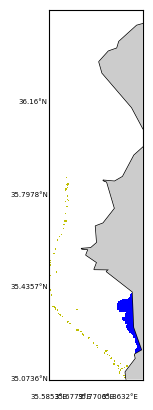

In [4]:
FSS = compute_multi_fss()
print("FSS:", FSS)

In [2]:
import sys
sys.path.append("/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211")

from src.controller.PathController import PathController

path_ins = PathController()

path_ins.get_sim_result_dir()

'/work/asc/machine_learning/projects/iMagine/bayes_opt_20240211/use_cases/syria/MDK_BAYESOPT_SIM_2021_08_23_1000_0072h_150.0m_1000_syria_20240212-153525'